Import packages and set paths

In [1]:
import os
import sys
import emc2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib as mpl
import pandas as pd
import numpy as np
import xarray as xr
import cftime
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

# Navigate to my EMC2 project data directory
os.chdir('/g/data/jk72/ck4840/projects/emc2/data/marcus_lidar_radar')
# Check current project data directory
print("Project data directory:", os.getcwd())

Project data directory: /g/data/jk72/ck4840/projects/emc2/data/marcus_lidar_radar


Candidate dates
2017-11-05,
2017-11-18,
2017-11-22,
2017-12-30,
2018-01-02,
2018-02-01,
2018-02-02,
2018-02-15,
2018-02-16,
2018-02-19,
2018-02-24

MPL

In [2]:
# Load MPL data
MPL = xr.open_dataset('20180201_MARCUS_OC_AP_120sec_v4.nc')
# Set Time and Altitude as coordinates
MPL = MPL.set_coords(['Time', 'Altitude'])
MPL

<xarray.Dataset>
Dimensions:                          (x: 720, y: 1001)
Coordinates:
    Time                             (x) |S19 ...
    Altitude                         (y) float32 ...
Dimensions without coordinates: x, y
Data variables: (12/20)
    Fog_Or_Low_Cloud                 (x) float32 ...
    Calibrated_Copol_Backscatter     (y, x) float32 ...
    Calibrated_Crosspol_Backscatter  (y, x) float32 ...
    Calibrated_Raman_Backscatter     (y, x) float32 ...
    Lidar_Copol_Signal               (y, x) float32 ...
    Lidar_Crosspol_Signal            (y, x) float32 ...
    ...                               ...
    ERA_N2_Molecular_Num_Density     (y, x) float32 ...
    ARM_Ceilometer_First_CBH         (x) float32 ...
    ARM_Ceilometer_Second_CBH        (x) float32 ...
    ARM_Ceilometer_Third_CBH         (x) float32 ...
    ARM_Ceilometer_Detection_Status  (x) float32 ...
    BoM RMAN lidar                   |S19 ...

In [3]:
# Create MPL data variables to use
MPL_time_strings = [str(time, 'utf-8') for time in MPL['Time'].values]
MPL_time = pd.to_datetime(MPL_time_strings, format='%H:%M:%S %d/%m/%Y')
MPL_time = mdates.date2num(MPL_time)
MPL_altitude = MPL['Altitude']*1000
MPL_total_backscatter = MPL['Calibrated_Copol_Backscatter'] + MPL['Calibrated_Crosspol_Backscatter']

In [4]:
MPL_total_backscatter_test = MPL_total_backscatter.values
MPL_total_backscatter_test[np.isinf(MPL_total_backscatter_test)] = np.nan

print(np.nanmax(MPL_total_backscatter_test))
print(np.nanmin(MPL_total_backscatter_test))

-7.64445
-22.247612


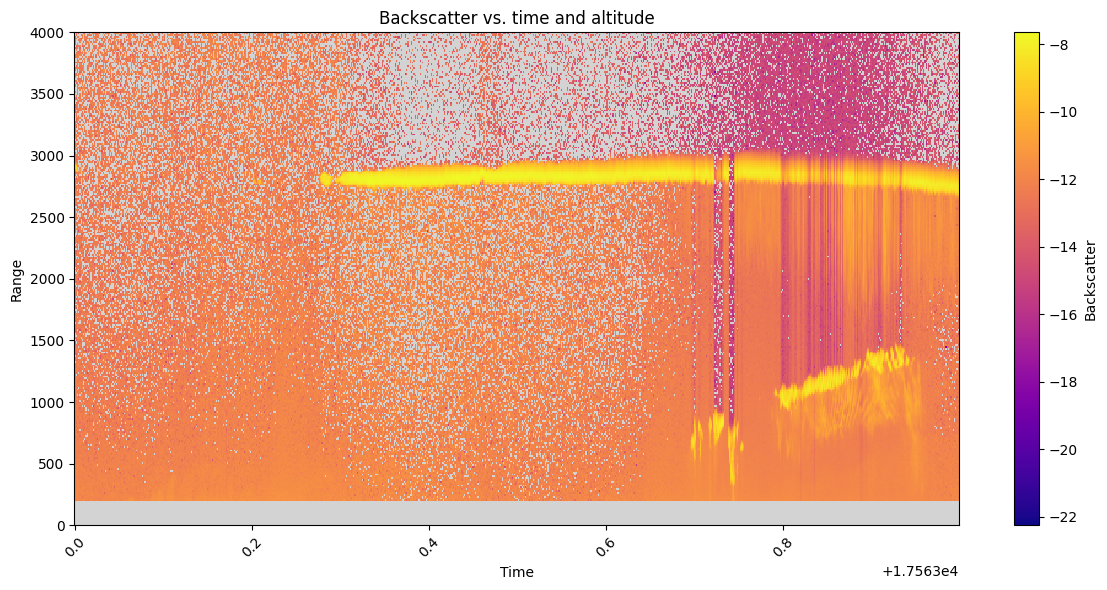

In [5]:
# Plot MPL data

# Create a meshgrid for time and range
MPL_time_mesh, MPL_altitude_mesh = np.meshgrid(MPL_time, MPL_altitude)

# Create the plot
plt.figure(figsize=(12, 6))

# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')

# Create a pcolormesh plot
pcm = plt.pcolormesh(MPL_time_mesh, MPL_altitude_mesh, MPL_total_backscatter, cmap='plasma', shading='auto')

plt.colorbar(pcm, label='Backscatter')
plt.xlabel('Time')
plt.ylabel('Range')
plt.title('Backscatter vs. time and altitude')

plt.ylim(0,4000)
plt.xticks(rotation=45)
plt.tight_layout()
MARCUS_backscatter_20180219 = plt.gcf()
# MARCUS_backscatter_20180219.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/MARCUS_backscatter_20180219.png', dpi=200)
plt.show()

MWACR

In [6]:
# Load MWACR data
MWACR = xr.open_dataset('mararsclwacr1kolliasM1.c1.20180201.000000.nc')
MWACR

<xarray.Dataset>
Dimensions:                      (time: 17280, height: 602, layer: 10)
Coordinates:
  * time                         (time) object 0006-11-01 08:45:36 ... 0006-1...
  * height                       (height) float32 226.8 256.8 ... 1.824e+04
  * layer                        (layer) int32 1 2 3 4 5 6 7 8 9 10
Data variables: (12/25)
    base_time                    datetime64[ns] ...
    time_offset                  (time) object ...
    qc_time                      (time) int32 ...
    reflectivity                 (time, height) float32 ...
    reflectivity_best_estimate   (time, height) float32 ...
    mean_doppler_velocity        (time, height) float32 ...
    ...                           ...
    qc_cloud_layer_top_height    (time, layer) int32 ...
    cloud_mask_95ghz_kollias     (time, height) float64 ...
    missing_data_flag            (time) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    alt                          (time) float32 ...
Attributes: (12/17)
    description:              ARSCL-like product for the ARM Mobile Facility ...
    author:                   Pavlos Kollias and Karen Johnson
    date:                      2007
    institute:                Brookhaven National Laboratory
    process_version:          $State:vap-arsclwacr1kollias-1.0-matlabR2012a-x...
    command_line:             Start_Wacr -d 20180201 -s mar-f M1
    ...                       ...
    doi:                      10.5439/1097547
    input_files_description:  A string consisting of the datastream(s), datas...
    input_files_num:          3
    input_files:              marceilM1.b1.20180201.000008.nc, marmwacrM1.a1....
    qc_standards_version:     1.0
    history:                  created by user troyan on machine cypher at 05-...

In [7]:
# Create MWACR variables to use
MWACR_time = MWACR['time']
MWACR_time = mdates.date2num(MWACR_time)
MWACR_altitude = MWACR['height']
MWACR_reflectivity = MWACR['reflectivity']

Number of MWACR_time_mesh rows: 602
Number of MWACR_time_mesh columns: 17280
Number of MWACR_altitude_mesh rows: 602
Number of MWACR_altitude_mesh columns: 17280
Number of MWACR_reflectivity rows: 17280
Number of MWACR_reflectivity columns: 602


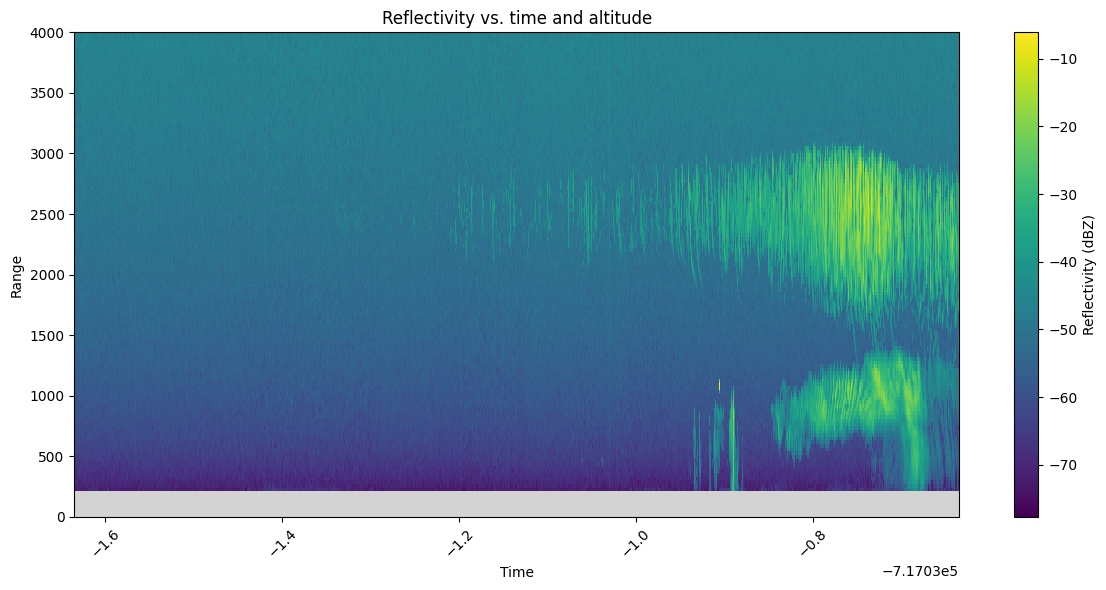

In [8]:
# Instrument data plotting - MWACR

# Create a meshgrid for time and range
MWACR_time_mesh, MWACR_altitude_mesh = np.meshgrid(MWACR_time, MWACR_altitude)

num_rows = MWACR_time_mesh.shape[0]
print("Number of MWACR_time_mesh rows:", num_rows)
num_columns = MWACR_time_mesh.shape[1]
print("Number of MWACR_time_mesh columns:", num_columns)

num_rows = MWACR_altitude_mesh.shape[0]
print("Number of MWACR_altitude_mesh rows:", num_rows)
num_columns = MWACR_altitude_mesh.shape[1]
print("Number of MWACR_altitude_mesh columns:", num_columns)

num_rows = MWACR_reflectivity.shape[0]
print("Number of MWACR_reflectivity rows:", num_rows)
num_columns = MWACR_reflectivity.shape[1]
print("Number of MWACR_reflectivity columns:", num_columns)

# Create the plot
plt.figure(figsize=(12, 6))

# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')

# Create a pcolormesh plot
pcm = plt.pcolormesh(MWACR_time_mesh, MWACR_altitude_mesh, MWACR_reflectivity.T, cmap='viridis')

plt.colorbar(pcm, label='Reflectivity (dBZ)')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4000)
plt.title('Reflectivity vs. time and altitude')

plt.xticks(rotation=45)
plt.tight_layout()
MARCUS_reflectivity_20180219 = plt.gcf()
# MARCUS_reflectivity_20180219.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/MARCUS_reflectivity_20180219.png', dpi=200)
plt.show()